In [1]:
!pip install gensim

In [2]:
import gensim.downloader as api

word_to_vec = api.load("word2vec-google-news-300")

In [3]:
# Similarity score of two words
word_to_vec.similarity(w1 = "great", w2="good")

0.729151

In [4]:
# Converting word to vector
great_vector = word_to_vec["great"]
great_vector

array([ 7.17773438e-02,  2.08007812e-01, -2.84423828e-02,  1.78710938e-01,
        1.32812500e-01, -9.96093750e-02,  9.61914062e-02, -1.16699219e-01,
       -8.54492188e-03,  1.48437500e-01, -3.34472656e-02, -1.85546875e-01,
        4.10156250e-02, -8.98437500e-02,  2.17285156e-02,  6.93359375e-02,
        1.80664062e-01,  2.22656250e-01, -1.00585938e-01, -6.93359375e-02,
        1.04427338e-04,  1.60156250e-01,  4.07714844e-02,  7.37304688e-02,
        1.53320312e-01,  6.78710938e-02, -1.03027344e-01,  4.17480469e-02,
        4.27246094e-02, -1.10351562e-01, -6.68945312e-02,  4.19921875e-02,
        2.50000000e-01,  2.12890625e-01,  1.59179688e-01,  1.44653320e-02,
       -4.88281250e-02,  1.39770508e-02,  3.55529785e-03,  2.09960938e-01,
        1.52343750e-01, -7.32421875e-02,  2.16796875e-01, -5.76171875e-02,
       -2.84423828e-02, -3.60107422e-03,  1.52343750e-01, -2.63671875e-02,
        2.13623047e-02, -1.51367188e-01,  1.04003906e-01,  3.18359375e-01,
       -1.85546875e-01,  

In [5]:
# Vector shape
great_vector.shape

(300,)

In [6]:
# Importing libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv("/content/fake_or_real_news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
# toatal value of target column
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

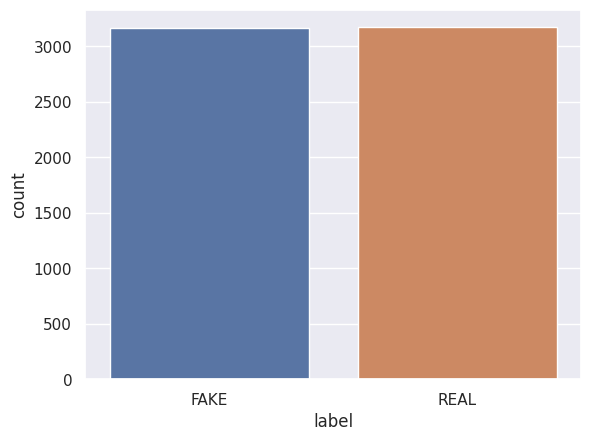

In [9]:
# target column visualization
sns.set()
sns.countplot(x="label", data=df)

In [10]:
# Handling missing values with empty string
df.fillna(" ", inplace=True)

In [11]:
# Finding missing values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [12]:
# Finding duplicates value
df.duplicated().sum()

0

In [13]:
# Create a new column, that is concatenation of "title" and "text" column
df["content"] = df.title + " " + df.text
df

,Unnamed: 0,title,text,label,content
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,State Department says it can't find emails fro...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,Anti-Trump Protesters Are Tools of the Oligarc...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"In Ethiopia, Obama seeks progress on peace, se..."


In [14]:
df.label

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [15]:
# Label encoding for target column
df["label"] = df["label"].map({"REAL":0, "FAKE":1})
df

,Unnamed: 0,title,text,label,content
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,The Battle of New York: Why This Primary Matte...
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0,State Department says it can't find emails fro...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1,Anti-Trump Protesters Are Tools of the Oligarc...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0,"In Ethiopia, Obama seeks progress on peace, se..."


In [16]:
# Removing unnecessary columns
df = df.drop(["Unnamed: 0","title","text"], axis=1)
df

,label,content
0,1,You Can Smell Hillary’s Fear Daniel Greenfield...
1,1,Watch The Exact Moment Paul Ryan Committed Pol...
2,0,Kerry to go to Paris in gesture of sympathy U....
3,1,Bernie supporters on Twitter erupt in anger ag...
4,0,The Battle of New York: Why This Primary Matte...
...,...,...
6330,0,State Department says it can't find emails fro...
6331,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,1,Anti-Trump Protesters Are Tools of the Oligarc...
6333,0,"In Ethiopia, Obama seeks progress on peace, se..."


In [17]:
!pip install spacy
!python -m spacy download en_core_web_lg

2023-08-18 13:38:59.237561: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 13:39:02.225901: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [18]:
# text preprocessing and vectorizing
import spacy

# load english language model and create nlp object for it
nlp = spacy.load("en_core_web_lg")

# Create function that will removing stop words,puntuations and returne lemmatizing and Vectorizing the text
def preprocess_and_vectorize(text):
    doc = nlp(text)

    fitered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        fitered_tokens.append(token.lemma_)

    return word_to_vec.get_mean_vector(fitered_tokens)

In [19]:
# Mean of two vectors with normalization
word_to_vec.get_mean_vector(["good", "great"])

array([ 2.43345574e-02,  5.82739711e-02, -9.95408464e-03,  5.56197092e-02,
        3.56049947e-02, -2.40510404e-02,  2.26558093e-02,  2.65534408e-03,
       -6.61010947e-03,  6.55990690e-02, -2.01354641e-02, -6.32802695e-02,
        1.34779196e-02,  1.11012142e-02, -2.47516409e-02,  5.41773513e-02,
        9.90234986e-02,  7.81564265e-02, -6.01863712e-02, -4.63416725e-02,
       -6.83395844e-03,  7.78919160e-02,  1.34586357e-03,  4.35783342e-02,
        8.92764181e-02,  4.27645221e-02, -5.59183657e-02,  1.60282962e-02,
        1.16384616e-02, -2.65587587e-02, -4.29916531e-02,  1.12238517e-02,
        1.06622085e-01,  2.65574045e-02,  6.52772337e-02,  3.22499201e-02,
       -2.04760320e-02,  1.74539238e-02,  6.41703419e-03,  5.72755709e-02,
        8.73269662e-02, -6.13221787e-02,  9.88907441e-02, -1.42011531e-02,
       -1.11784097e-02,  1.05505157e-02,  5.62019013e-02, -1.35655645e-02,
        2.40344685e-02, -4.50019948e-02,  4.11081649e-02,  1.20324552e-01,
       -6.20831475e-02, -

In [20]:
word_to_vec.get_mean_vector(["good", "great"])[:5]

array([ 0.02433456,  0.05827397, -0.00995408,  0.05561971,  0.03560499],
      dtype=float32)

In [21]:
# Mean of two vectors
v1 = word_to_vec["good"]
v2 = word_to_vec["great"]
mean_vector = np.mean([v1, v2], axis=0)[:5]
mean_vector

array([ 0.05615234,  0.1352539 , -0.02294922,  0.12866211,  0.08276367],
      dtype=float32)

In [22]:
# Mean of two vectors without normalization, that is same as np.mean() function
word_to_vec.get_mean_vector(["good", "great"], pre_normalize=False)[:5]

array([ 0.05615234,  0.1352539 , -0.02294922,  0.12866211,  0.08276367],
      dtype=float32)

In [23]:
# Create new column, which is vectorized of "content" column
df["vetorized_content"] = df["content"].apply(lambda x: preprocess_and_vectorize(x))
df

,label,content,vetorized_content
0,1,You Can Smell Hillary’s Fear Daniel Greenfield...,"[0.024925785, 0.012667106, -0.00094697677, 0.0..."
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,"[0.027567929, 0.009750756, -0.0030943165, 0.02..."
2,0,Kerry to go to Paris in gesture of sympathy U....,"[0.008751042, 0.017524324, 0.014567218, 0.0210..."
3,1,Bernie supporters on Twitter erupt in anger ag...,"[0.026891643, 0.0025977446, -0.004824181, 0.01..."
4,0,The Battle of New York: Why This Primary Matte...,"[0.01654407, 0.011988895, -0.0034814246, -0.00..."
...,...,...,...
6330,0,State Department says it can't find emails fro...,"[-0.004676544, -0.0015039728, -0.0039234757, 0..."
6331,1,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,"[0.0075108036, 0.013671164, 0.007019853, 0.034..."
6332,1,Anti-Trump Protesters Are Tools of the Oligarc...,"[0.0136597, 0.00885456, 0.0059509915, 0.034705..."
6333,0,"In Ethiopia, Obama seeks progress on peace, se...","[0.0070292084, 0.025068056, 0.013842667, 0.029..."


In [24]:
# splitting the datasets into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["vetorized_content"].values, df["label"], test_size=0.20, stratify=df['label'], random_state=2023)

In [26]:
print(df["vetorized_content"].shape, x_train.shape, x_test.shape)

(6335,) (5068,) (1267,)


In [27]:
x_train

array([array([ 8.39410722e-03,  7.52234482e-04, -9.04162973e-03,  1.91017743e-02,
              -4.11003828e-02,  8.70975014e-03,  1.11588342e-02, -1.94357745e-02,
               2.13437285e-02,  6.57878257e-03,  4.42150049e-03, -1.12184985e-02,
               1.44303357e-03,  2.63035987e-02, -1.30349789e-02,  5.59008634e-03,
               8.92696530e-03,  1.85287464e-02,  1.33264437e-03, -2.70711780e-02,
               1.65064353e-02,  3.23684514e-02,  2.01381911e-02, -4.45354031e-03,
               1.24381529e-03,  1.12038234e-03, -4.61583734e-02,  1.73585583e-02,
               2.77469382e-02, -1.08681377e-02, -6.65548863e-03,  1.57369692e-02,
              -3.15344073e-02, -5.02681881e-02,  8.41318251e-05, -1.55733237e-02,
               1.45295486e-02,  2.42382963e-03,  1.51449163e-02,  1.45694101e-02,
               1.39942365e-02, -2.76040379e-02,  2.22959295e-02, -1.29031041e-03,
              -2.13535689e-02, -2.28931792e-02, -1.71558522e-02,  3.96257779e-03,
               2

In [28]:
x_train.ndim

1

Scikit_learn Model expects 2D x_train and x_test

In [29]:
# Converting 1D to 2D
x_train_2d = np.stack(x_train)
x_test_2d = np.stack(x_test)

In [30]:
x_train_2d

array([[ 0.00839411,  0.00075223, -0.00904163, ...,  0.01081954,
         0.00338408, -0.00289316],
       [ 0.0081738 ,  0.01278205,  0.01182246, ..., -0.03342729,
         0.0133307 ,  0.00010424],
       [ 0.01003695, -0.00110268, -0.00400951, ..., -0.01348867,
         0.014727  , -0.00031016],
       ...,
       [ 0.0050023 ,  0.01266936,  0.02599797, ..., -0.01676347,
         0.0132639 ,  0.00543082],
       [ 0.00831364,  0.02281915, -0.0019928 , ..., -0.00851939,
         0.01376395, -0.01101622],
       [ 0.01540642,  0.00441306,  0.00621794, ..., -0.03117241,
         0.01546551, -0.00360146]], dtype=float32)

In [31]:
x_train_2d.ndim

2

In [32]:
x_test_2d

array([[ 0.01523543,  0.00779706, -0.00787654, ..., -0.0159689 ,
         0.01833668,  0.00975086],
       [ 0.00707066,  0.00627327,  0.00689342, ..., -0.02022394,
         0.01464677, -0.00622833],
       [ 0.01125818, -0.00216473, -0.01634577, ..., -0.00775577,
         0.00546477, -0.01816328],
       ...,
       [ 0.01479608,  0.01074298,  0.00198466, ..., -0.01834831,
         0.01596824,  0.00733113],
       [ 0.01934671,  0.00606397, -0.00545821, ..., -0.00457796,
         0.0023491 , -0.00678647],
       [ 0.00131346,  0.01231885,  0.00578806, ..., -0.00936551,
         0.01210384,  0.00842924]], dtype=float32)

Training the model to Gradient Boosting Classifier Model

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(x_train_2d, y_train)

GradientBoostingClassifier()

In [34]:
# x_test prediction
y_pred = clf.predict(x_test_2d)

In [35]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       634
           1       0.87      0.92      0.90       633

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [36]:
# Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       634
           1       0.87      0.92      0.90       633

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



<Axes: >

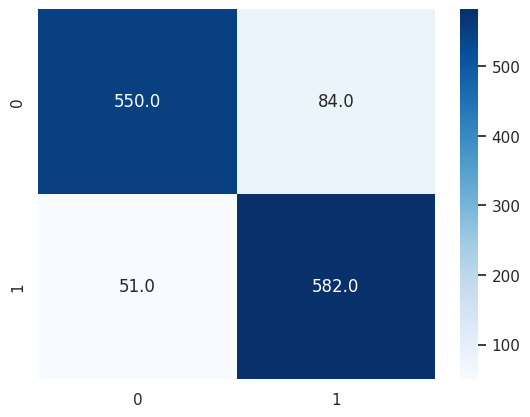

In [37]:
# Confusuion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualization
sns.set()
sns.heatmap(cm, fmt= ".1f", annot=True, cbar=True, cmap="Blues")

In [38]:
y_test[:5]

467     0
2240    1
4582    1
1682    1
178     0
Name: label, dtype: int64



1.   REAL_NEWS ==> 0
2.   FAKE_NEWS ==> 1



In [39]:
y_pred[:5]

array([0, 1, 0, 1, 0])